# 22. Matched Pairs Testing

In [1]:
from datascience import *
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from scipy import stats

We will continue to work with a subset of the `personality` table called `pers` but the use pretest vs. posttest data in the `Stress1` and `Stress2` variables. They are the same measure, but one was conducted in the second week of the academic semester while the other was conducted in the seventh week. The **research question** asks whether stress levels are higher during midterms than early in the semester.

In [2]:
pers = Table.read_table('http://faculty.ung.edu/rsinn/perfnarc.csv')
pers.show(5)

Sex,G21,Greek,AccDate,Stress1,Stress2,Perf,Narc
F,N,N,N,9,7,99,3
F,Y,N,Y,11,13,86,2
F,N,Y,N,15,14,118,4
F,N,N,Y,16,15,113,2
F,Y,N,Y,17,17,107,8


## Matched Pairs Data

The exact same students were surveyed in what researchers call a pre-post format. This is **not** an A/B test because we don't have two groups of subjects A and B, we have one group only. Let's gather the columns we need.

In [3]:
stress = pers.select('Stress1','Stress2')
stress

Stress1,Stress2
9,7
11,13
15,14
16,15
17,17
10,7
16,18
12,12
11,16
18,16


### Gain Scores

The null hypothesis is that there is no change in stress between the pretest measure (2nd week) and the posttest measure (7th week). We are primarily interested in how individual stress scores changed, either increasing or decreasing, so we produce a third column called `Gain` to measure the increase from pre to post.

$$\text{Gain} = \text{Post} - \text{Pre}$$

In [4]:
pre = stress.column(0)
post = stress.column(1)
gain = post - pre
gain

array([ -2,   2,  -1,  -1,   0,  -3,   2,   0,   5,  -2,  -2,   5,   1,
        -6,   0,  -2,   5,   2,   1,  -6,   4,   2,  -2,   5,   0,   0,
        -1,  -2,   3,  -1,   3,  -1,  -1,  -3,   0,   0,   6,  -2,   5,
         2,   3,  -1,   0,   1,   0,  -4,   6,  -4,   3,   5,   0,   4,
         2,   7,   1,   4, -10,  -2,   3,   2,   4,  -7,   5,  -2,  -3,
        -1,  -1,   4,  -4,   0,   6,   2,  -3,   2,  -5,   1,   2,  -3,
        -1,   0,   0,   0,   0,   0,   0,   1,   0,   2,  -2,   0,   6,
         1,   4,   0,   1,  -3,   1,   4,   3,   1,   1,   3,   0,   7,
         5,   0,   1,  -2,   1,   5,   0,  -4,  -4,   2,  -1,   0,  -1,
         1,  -4,  -2,   5,   4,   3,   2,   2,   3,   4,   2,  -1,   4,
         4,   9,  -5,   2,   1,   3,   5,   5,  -3,   0,   0,   0,   7,
        12,   0,  -2,   3,  -4])

In [5]:
stress = stress.with_column('Gain',gain)
stress

Stress1,Stress2,Gain
9,7,-2
11,13,2
15,14,-1
16,15,-1
17,17,0
10,7,-3
16,18,2
12,12,0
11,16,5
18,16,-2


We first want to determine the observed gain value to see if stress scores increased.

In [6]:
obs_gain = np.average(gain)
obs_gain

0.831081081081081

### Simulating the null hypothesis in a pretest vs. posttest design

The null hypothesis is that there is no difference between pretest and posttest scores. In that case, the gain would be zero, and it would not matter if we switched the pre and post scores. That's exactly how we will randomize the test statistic: randomly change the signs of the gain scores.

In [7]:
sign = make_array(-1,1)

In [8]:
n = len(gain)
n

148

In [9]:
ones = np.random.choice(sign,148)
ones

array([ 1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1,
       -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
       -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
        1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,
       -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1], dtype=int64)

Now we have a random assortment of postive and negative ones. We can multiply this array times the gain array. The result will be a random choice of sign for the gain scores. The absolute value of the gain scores will remain fixed.

In [10]:
rand_gain = ones * gain
rand_gain

array([-2,  2,  1,  1,  0,  3, -2,  0, -5, -2, -2,  5,  1, -6,  0,  2,  5,
        2,  1,  6,  4,  2, -2,  5,  0,  0, -1, -2, -3, -1,  3,  1,  1, -3,
        0,  0,  6,  2,  5, -2,  3,  1,  0,  1,  0,  4,  6,  4, -3, -5,  0,
       -4, -2, -7,  1,  4, 10,  2, -3,  2,  4, -7, -5, -2, -3, -1,  1,  4,
        4,  0,  6, -2,  3, -2, -5, -1, -2,  3,  1,  0,  0,  0,  0,  0,  0,
        1,  0,  2,  2,  0,  6,  1, -4,  0, -1,  3,  1,  4,  3, -1,  1,  3,
        0, -7, -5,  0,  1, -2, -1, -5,  0, -4, -4, -2, -1,  0, -1,  1, -4,
        2, -5, -4, -3, -2, -2,  3,  4,  2,  1, -4, -4,  9, -5, -2,  1, -3,
        5,  5, -3,  0,  0,  0,  7, 12,  0, -2,  3, -4], dtype=int64)

Like before, we can simulate the statistic thousands of times to determine what the test statistic distribution looks like.

In [11]:
avg_gains = make_array()

# Set reps to 2k or less especially if working in the cloud
reps = 25000

for i in range(reps):
    ones = np.random.choice(sign,n)
    new_avg_gain = np.average(ones * gain)
    avg_gains = np.append(avg_gains, new_avg_gain)
    
# Remove hashtag comment below to see the gains array   
# gains

In [12]:
def ab_hist(myArray, observed_value):
    tab = Table().with_column('Average Gains',myArray)
    tab.hist(0)
    _ = plots.plot([observed_value, observed_value], [0, 0.1], color='red', lw=2)

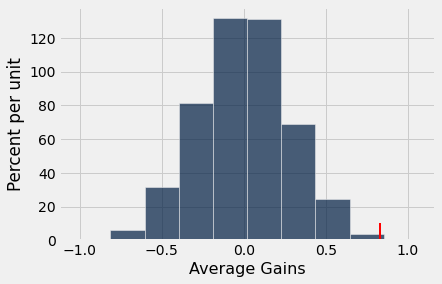

In [13]:
ab_hist(avg_gains,obs_gain)

I changed the $x$-axis title in the `ab_hist` fucntion, but everything else is identical the previous two notebooks. We can calculate a $p$-value using a truth array. The observed average gain in stress appears to be atypical given the conditions of the null hypothesis.

In [14]:
p = sum( avg_gains >= obs_gain ) / reps
p

0.00148

### Results: Stress example

Reject the null hypothesis. There appears to be a significant increase in stress at midterms compared to the second week of the semester.

## Example: Murder rates in U.S. states

The example data and research question were provided in the Data8 materials received from Berkeley (Lab 7). When investigating whether the death penalty could serve as a deterrent (and ignoring all political and moral aspects of the question), the fact that the death penalty was ruled unconstitutional by the U.S. Supreme Court in 1972 was noted as a natural experiment. The 44 states that had the death penalty at the time exprienced an indavertent pretest-posttest design.

The Data8 materials incorrectly performed an A/B test on this paired data. The resulting $p$-value is approximately 0.25, so the proper conclusion is to fail to reject the null which suggests the death penalty was no detterent. Murder rates were not significantly different in 1973 when compared with 1971 rates.

Yet, the correct way to test paired data is to compare the increase or decrease in each state, not to randomly reshuffle the years of 1971 and 1973 as if they were demographic labels. We will use a matched pairs design to evaluate the results as if they were a pre-post design.

The code block below recreates the needed data set for our work. We have to eliminate the six states that did not have the death penalty in 1971, then isolate the murder rates in 1971 and 1973 respectively.

In [15]:
murder = Table.read_table('http://faculty.ung.edu/rsinn/crime_rates.csv').select('State', 'Year', 'Population', 'Murder Rate')
non_death_penalty_states = make_array('Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota')
murder_1971 = murder.where('State',are.not_contained_in(non_death_penalty_states)).where('Year', 1971)
murder_1973 = murder.where('State',are.not_contained_in(non_death_penalty_states)).where('Year', 1973)
pre_post_murder = murder_1971.join('State',murder_1973).select('State','Murder Rate', 'Murder Rate_2')
pre_post_murder = (pre_post_murder
                   .relabel('Murder Rate', 'Murder Rate 1971')
                   .relabel('Murder Rate_2', 'Murder Rate 1973'))
pre_post_murder

State,Murder Rate 1971,Murder Rate 1973
Alabama,15.1,13.2
Arizona,6.7,8.1
Arkansas,10.5,8.8
California,8.1,9
Colorado,6.5,7.9
Connecticut,3.1,3.3
Delaware,6.1,5.9
Florida,13.3,15.4
Georgia,16,17.4
Idaho,3.3,2.6


In [16]:
pre = pre_post_murder.column(1)
post = pre_post_murder.column(2)
gain = post - pre

obs_murder_rate_gain = np.average(gain)
obs_murder_rate_gain

0.606818160065909

In [17]:
murder_rate_gain = make_array()

# Set reps to 2k or less especially if working in the cloud
reps = 25000

for i in range(reps):
    ones = np.random.choice(sign,44)
    new_avg_gain = np.average(ones * gain)
    murder_rate_gain = np.append(murder_rate_gain, new_avg_gain)
    
# Remove hashtag comment below to see the gains array   
# avg_gain_murder

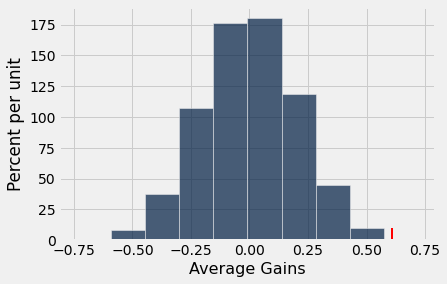

In [18]:
ab_hist(murder_rate_gain, obs_murder_rate_gain)

In [19]:
p_val = sum( murder_rate_gain >= obs_murder_rate_gain ) / repetitions
p_val

NameError: name 'repetitions' is not defined

When the appropriate testing method is used, we reject the null and find a signficant positive difference between the prestest (1971 murder rates) and the posttest (1973 murder rates). Evidence suggests the death penalty may be a deterant.